In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
dataset = {
    'tempo': [1,3,4,4,6,8,10,10,11,14],
    'vendas':[91, 110, 106, 116, 119,129, 139,143, 138, 159]
    }

dataset = pd.DataFrame(dataset)
dataset.head(10)

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119
5,8,129
6,10,139
7,10,143
8,11,138
9,14,159


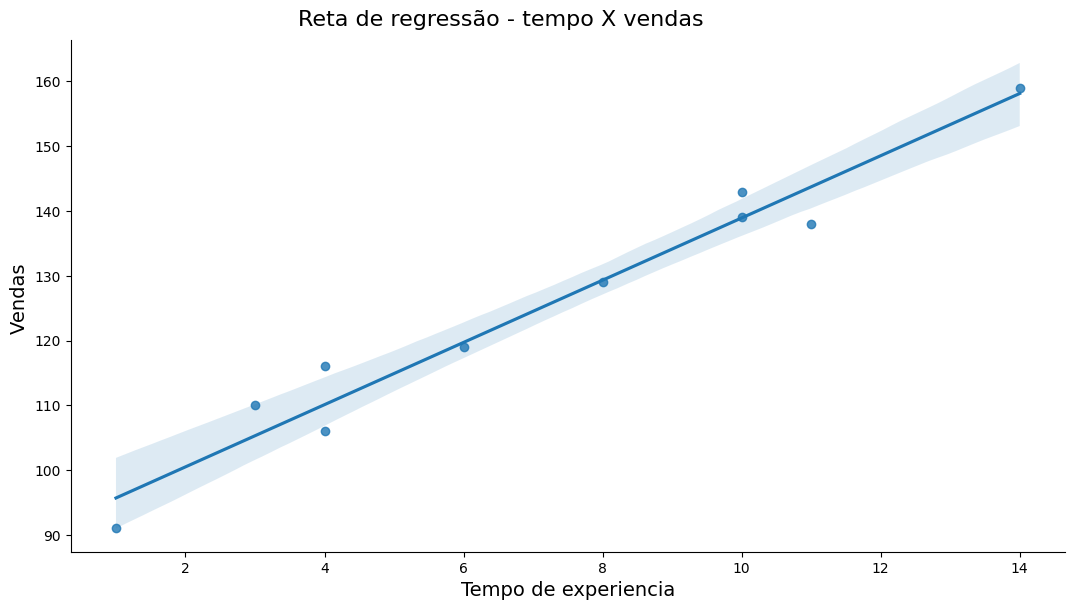

In [10]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(data = dataset,x='tempo', y='vendas')

# Configurando o gráfico
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão - tempo X vendas', fontsize=16, y=1.02)
ax.set_xlabels('Tempo de experiencia', fontsize=14)
ax.set_ylabels('Vendas ', fontsize=14)

ax

In [12]:
dataset.corr()
# Podemos ver que a correlação entre tempo e venda está muito alta

,tempo,vendas
tempo,1.000000,0.980112
vendas,0.980112,1.000000


In [15]:
# Estimando o y
import statsmodels.api as sm

In [16]:
y= dataset.vendas
x= sm.add_constant(dataset.tempo)

In [18]:
# Treinando o modelo
resultado_da_regressao = sm.OLS(y,x).fit()

In [20]:
print(resultado_da_regressao.summary())
# Verificar sempre que o r^2 está bem alto

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           6.68e-07
Time:                        19:47:50   Log-Likelihood:                -27.611
No. Observations:                  10   AIC:                             59.22
Df Residuals:                       8   BIC:                             59.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.8980      2.791     32.567      0.0

In [21]:
# Verificando o quanto estamos errando
dataset['y_previsto'] = resultado_da_regressao.predict()
dataset.head()

,tempo,vendas,y_previsto
0,1,91,95.701097
1,3,110,105.307295
2,4,106,110.110394
3,4,116,110.110394
4,6,119,119.716591


In [23]:
# residuo entre o previsto e o que vendeu na realidade
dataset['residuo'] = dataset['y_previsto'] - dataset['vendas']
dataset.head()

,tempo,vendas,y_previsto,residuo
0,1,91,95.701097,4.701097
1,3,110,105.307295,-4.692705
2,4,106,110.110394,4.110394
3,4,116,110.110394,-5.889606
4,6,119,119.716591,0.716591
